In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

# pd.options.display.max_seq_items = 200
# pd.options.display.max_columns = 200

# Business Understanding

Questions:

1. What are the most popular languages?
2. How do different languages relate to job satisfaction?
3. What are the languages that most people choose as their starting language?

# Data Understanding (Common)

We will use the data of StackOverflow's Developer Survey from 2017-2019. [link](https://insights.stackoverflow.com/survey)

In [2]:
data = {}
data['2017'] = pd.read_csv('dataset/developer_survey_2017/survey_results_public.csv')
data['2018'] = pd.read_csv('dataset/developer_survey_2018/survey_results_public.csv', low_memory=False)
data['2019'] = pd.read_csv('dataset/developer_survey_2019/survey_results_public.csv', low_memory=False)

In [3]:
# basic check
for year in ['2017', '2018', '2019']:
    df = data[year]
    print(f'year:{year}\n')
    print(f'shape:{df.shape}\n')
    no_nulls_cols = set(df.columns[df.isnull().mean()==0])
    print(f'columns with no missing values:\n{no_nulls_cols}\n')
    most_missing_cols = set(df.columns[df.isnull().mean()>.5])
    print(f'columns with more than 50% missing values:\n{most_missing_cols}\n')

year:2017

shape:(51392, 154)

columns with no missing values:
{'University', 'ProgramHobby', 'Professional', 'EmploymentStatus', 'FormalEducation', 'Country', 'Respondent'}

columns with more than 50% missing values:
{'InfluenceDeptTech', 'AssessJobLeaders', 'AssessJobProjects', 'ExCoderBalance', 'InfluenceCommunication', 'ExCoderNotForMe', 'WantWorkFramework', 'ExCoderSkills', 'InfluenceServers', 'Salary', 'InfluenceDatabase', 'AssessJobProfDevel', 'JobProfile', 'ResumePrompted', 'HaveWorkedFramework', 'ExCoder10Years', 'HoursPerWeek', 'AssessJobOffice', 'ExCoderBelonged', 'AssessJobDept', 'Currency', 'CousinEducation', 'AssessJobExp', 'NonDeveloperType', 'WebDeveloperType', 'AssessJobProduct', 'AssessJobFinances', 'ExCoderActive', 'AssessJobRemote', 'WantWorkDatabase', 'InfluenceRecruitment', 'InfluenceWorkstation', 'InfluenceHardware', 'ExpectedSalary', 'EducationImportant', 'MetricAssess', 'AssessJobRole', 'YearsCodedJobPast', 'LearnedHiring', 'InfluenceTechStack', 'InfluenceCloud

In [4]:
data['2017'].head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['2018'].head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [6]:
data['2019'].head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


# Solutions

## What are the most popular languages?

### Data Understanding

In [7]:
# columns indicating what languages are used by individual developers
worked_langs_col_dict = {
    '2017': 'HaveWorkedLanguage',
    '2018': 'LanguageWorkedWith',
    '2019': 'LanguageWorkedWith',
}

In [8]:
# check the proportion of missing values in these columns
for year, col in worked_langs_col_dict.items():
    print(year, data[year][col].isnull().mean())

2017 0.2873404420921544
2018 0.20758686965757928
2019 0.014783479405510615


### Prepare Data

In [9]:
def separate_langs(mixed_langs_str, delimiter=';'):
    """
    INPUT:
        mixed_langs_str - the string you want to separate 
    OUTPUT:
        a list with separated values
    """
    return [val.strip() for val in mixed_langs_str.split(delimiter)]

In [10]:
def possible_vals_set(df, col):
    """
    INPUT:
        df - the pandas dataframe you want to search
        col - the column you want to collect unique values 
    OUTPUT:
        vals_set - a set of unique values in df[col]
    """
    vals_set = set()
    mixed_lst = df[col].value_counts().index.tolist()
    for mixed_val in mixed_lst:
        mixed_val_set = set(separate_langs(mixed_val))
        vals_set = vals_set | mixed_val_set
    return vals_set

In [11]:
# get possible languages in each year
possible_langs = {}

for year, col in worked_langs_col_dict.items():
    possible_langs[year] = possible_vals_set(data[year], col)

possible_langs

{'2017': {'Assembly',
  'C',
  'C#',
  'C++',
  'Clojure',
  'CoffeeScript',
  'Common Lisp',
  'Dart',
  'Elixir',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'Hack',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Lua',
  'Matlab',
  'Objective-C',
  'PHP',
  'Perl',
  'Python',
  'R',
  'Ruby',
  'Rust',
  'SQL',
  'Scala',
  'Smalltalk',
  'Swift',
  'TypeScript',
  'VB.NET',
  'VBA',
  'Visual Basic 6'},
 '2018': {'Assembly',
  'Bash/Shell',
  'C',
  'C#',
  'C++',
  'CSS',
  'Clojure',
  'Cobol',
  'CoffeeScript',
  'Delphi/Object Pascal',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'HTML',
  'Hack',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Kotlin',
  'Lua',
  'Matlab',
  'Objective-C',
  'Ocaml',
  'PHP',
  'Perl',
  'Python',
  'R',
  'Ruby',
  'Rust',
  'SQL',
  'Scala',
  'Swift',
  'TypeScript',
  'VB.NET',
  'VBA',
  'Visual Basic 6'},
 '2019': {'Assembly',
  'Bash/Shell/PowerShell',
  'C',
  'C#',
  'C++',
  'Clojure',
  'Dart',
  'Elixir',
  'Erlang',
  'F#',

In [12]:
# get common languages in all years
common_langs = None

for year in worked_langs_col_dict.keys():
    if common_langs is None:
        common_langs = possible_langs[year]
        continue
    common_langs = common_langs & possible_langs[year]

common_langs

{'Assembly',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Erlang',
 'F#',
 'Go',
 'Java',
 'JavaScript',
 'Objective-C',
 'PHP',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA'}

In [13]:
def total_count_lang(df, look_for):
    """
    INPUT:
        df - the pandas dataframe you want to search
        look_for - a list of strings you want to search for in each row of df['language']
    OUTPUT:
        new_df - a dataframe of each look_for with the count of how often it shows up
    """
    new_df = defaultdict(int)
    for lang in look_for:
        for idx in range(df.shape[0]):
            if lang in separate_langs(df['language'][idx]):
                new_df[lang] += int(df['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['language', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [14]:
def clean_lang(df, col, possible_vals):
    """
    INPUT: 
        df - a dataframe holding the worked language column
        col - the column you want to clean values
        possible_vals - a list of strings you want to search for in each row of df[col]
    OUTPUT:
        new_df - a dataframe with the proportions of how many individuals
    """
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': 'language', col: 'count'}, inplace=True)
    new_df = total_count_lang(new_df, possible_vals)
    new_df['count'] = new_df['count']/len(df.dropna(subset=[col], how='any'))
    new_df['rank'] = np.arange(1, len(new_df)+1)
    new_df.set_index('language', inplace=True)
    return new_df

In [15]:
# clean up language columns
langs = {}
for year, col in worked_langs_col_dict.items():
    langs[year] = clean_lang(data[year], col, possible_langs[year])

### Visualize the Results

In [16]:
def plot_lang(df, title):
    """
    INPUT:
        df - a dataframe holding the worked language column
        title - the title string of your plot         
    OUTPUT:
        None
    """
    df[['count']].plot(figsize=(10,6), kind='bar', legend=None)
    plt.tick_params(left=False, bottom=False)
    plt.grid(True, axis='y')
    plt.title(title)
    plt.box(False)
    plt.show();

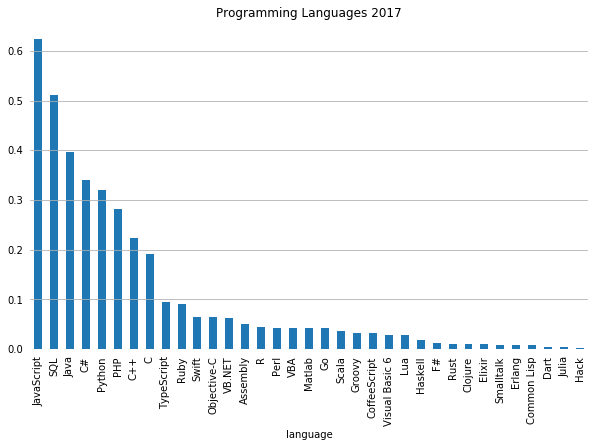

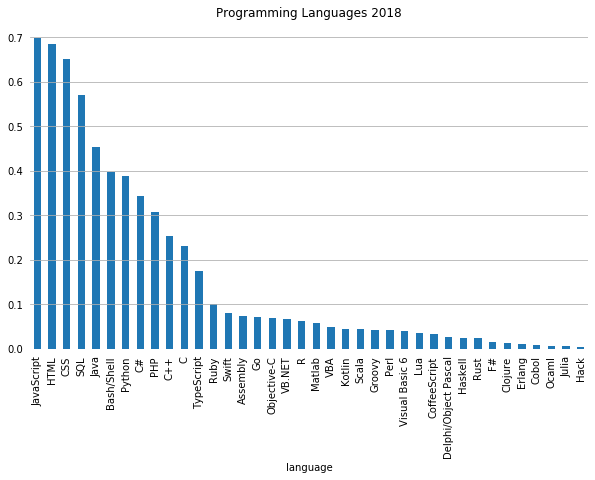

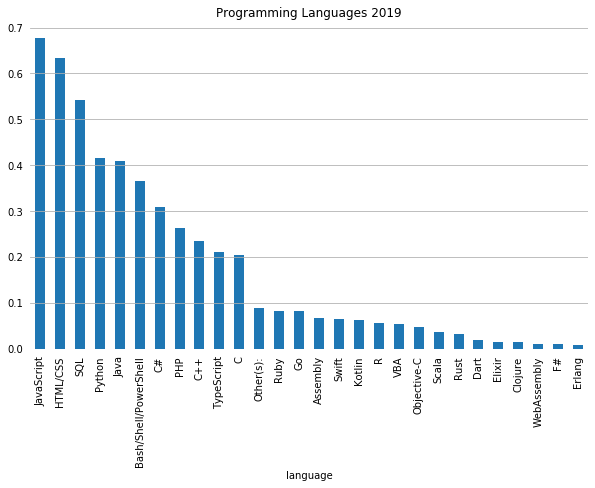

In [17]:
# plot the proportion of languages in each year
for year, col in worked_langs_col_dict.items():
    plot_lang(langs[year], f'Programming Languages {year}')

We can see some popular languages are added into the surveys in recent years (e.g. HTML and CSS are added from 2018). To compare them fairly, we will just plot the common languages existing in all these years.

In [18]:
# get rankings of common languages in all years
langs_ranks = pd.DataFrame(index=common_langs)
for year in worked_langs_col_dict.keys():
    langs_ranks = langs_ranks.merge(langs[year], left_index=True, right_index=True, how='inner').drop('count', axis=1)
langs_ranks.columns = worked_langs_col_dict.keys()
langs_ranks.transpose()

,SQL,Rust,Assembly,VBA,Java,Swift,Go,F#,TypeScript,PHP,...,R,Erlang,C#,Ruby,C++,Python,JavaScript,Scala,Objective-C,C
2017,2,27,14,17,3,11,19,26,9,6,...,15,31,4,10,7,5,1,20,12,8
2018,4,31,15,21,5,14,16,32,12,9,...,19,34,8,13,10,7,1,23,17,11
2019,3,22,15,19,5,16,14,27,10,8,...,18,28,7,13,9,4,1,21,20,11


In [106]:
# plot rankings of different languages in all years
def plot_rankings(df, max_rank, title):
    """
    INPUT:
        df - a dataframe you want to plot
        max_rank - the maximum value of rank
        title - the title string of your plot         
    OUTPUT:
        None
    """
    df.sort_values(by='2019', ascending=True).transpose().plot(
        figsize=(10, 10),
        kind='line', 
        ylim=(max_rank, 0),
        yticks=range(1,max_rank),
    )
    plt.tick_params(labelright=True, left=False, right=False, top=False, bottom=False)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title(title)
    plt.box(False)
    plt.show();

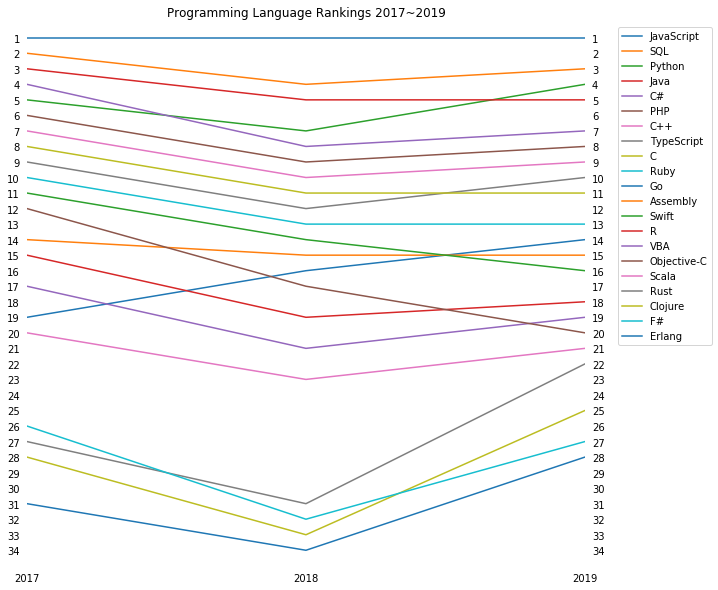

In [107]:
plot_rankings(langs_ranks, 35, 'Programming Language Rankings 2017~2019')

## How do different languages relate to job satisfaction?

### Data Understanding

In [20]:
# columns indicating job satisfaction
job_sat_col_dict = {
    '2017': 'JobSatisfaction',
    '2018': 'JobSatisfaction',
    '2019': 'JobSat',
}

In [21]:
# check the proportion of missing values in these columns
for year, col in job_sat_col_dict.items():
    print(year, data[year][col].isnull().mean())

2017 0.21435242839352428
2018 0.2992160234687168
2019 0.2013320882508466


In [22]:
def plot_value_counts(col, df, title):
    """
    INPUT: 
        col - the column you want to count values
        df - the dataframe holding the column
        title - the title of the plot
    OUTPUT:
        None
    """
    feat_vals = df[col].value_counts()
    (feat_vals/df.shape[0]).sort_index().plot(kind="bar");
    plt.title(title)
    plt.show();

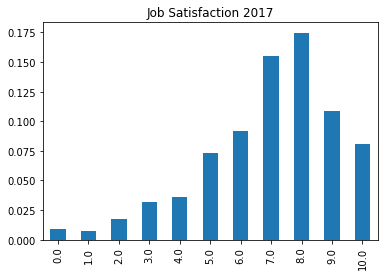

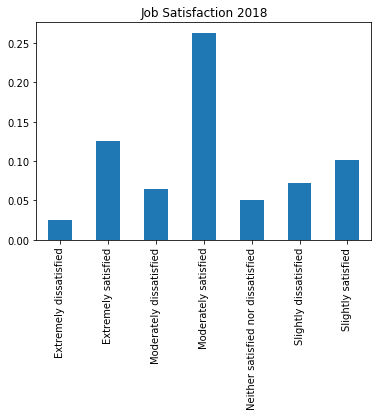

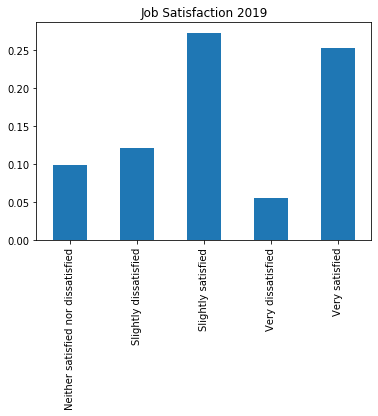

In [23]:
# check the proportion of each value in these columns
for year, col in job_sat_col_dict.items():
    plot_value_counts(col, data[year], f'Job Satisfaction {year}')

### Prepare Data

Because each survey has a different job satisfaction level, we have to re-encode those fine scales into the same rough scale before comparison.

In [24]:
# column names for re-encoded columns
job_sat_enc_col_dict = {
    '2017': 'JobSatisfaction_encoded',
    '2018': 'JobSatisfaction_encoded',
    '2019': 'JobSat_encoded',
}

In [25]:
# create a dict for re-encoding
job_sat_enc_dict = {
    '2017': {
        0: -2,
        1: -1.6,
        2: -1.2,
        3: -0.8,
        4: -0.4,
        5: 0,
        6: 0.4,
        7: 0.8,
        8: 1.2,
        9: 1.6,
        10: 2,
    },
    '2018': {
        'Extremely satisfied': 2,
        'Moderately satisfied': 1.5,
        'Slightly satisfied': 1,
        'Neither satisfied nor dissatisfied': 0,
        'Slightly dissatisfied': -1,
        'Moderately dissatisfied': -1.5,
        'Extremely dissatisfied': -2,
    },
    '2019': {
        'Very satisfied': 2,
        'Slightly satisfied': 1,
        'Neither satisfied nor dissatisfied': 0,
        'Slightly dissatisfied': -1,
        'Very dissatisfied': -2,
    },
}

In [26]:
def total_count_job_sat(df, look_for):
    """
    INPUT:
        df - the pandas dataframe you want to search
        look_for - a list of strings you want to search for in each row of df['language']
    OUTPUT:
        new_df - a dataframe of each look_for with the count and the mean
    """
    s = [defaultdict(int), defaultdict(int)]
    for lang in look_for:
        for idx in range(df.shape[0]):
            if lang in separate_langs(df['language'][idx]):
                s[0][lang] += int(df['count'][idx])
                s[1][lang] += int(df['job_sat_sum'][idx])

    new_df = pd.concat([pd.Series(s[0]), pd.Series(s[1])], axis=1)
    new_df.reset_index(inplace=True)
    new_df.columns = ['language', 'count', 'job_sat_sum']
    
    new_df['job_sat_mean'] = new_df['job_sat_sum'] / new_df['count']
    new_df.sort_values('job_sat_mean', ascending=False, inplace=True)
    new_df.set_index('language', inplace=True)
    
    return new_df

In [27]:
def clean_job_sat(df, lang_col, possible_langs, job_col, job_enc_col, job_enc_dict):
    """
    INPUT:
        df - the pandas dataframe you want to search
        lang_col - the column name with languages strings
        possible_langs - a list of languages you want to search for in each row of df[lang_col]
        job_col - the column name with job satisfaction values
        job_enc_col - the re-encoded column name for job_col
        job_enc_dict - the mapping dictionary for re-encoding
    OUTPUT:
        new_df - a dataframe for each possible_langs with the count and the mean of job satisfaction
    """
    # re-encode Job Satisfaction column values
    df[job_enc_col] = df[job_col].map(job_enc_dict, na_action='ignore')

    # group by languages
    new_df = pd.DataFrame(df[lang_col].value_counts())
    new_df['job_sat_sum'] = df.groupby([lang_col]).sum()[job_enc_col]
    new_df = new_df.reset_index()
    new_df.rename(columns={'index': 'language', lang_col: 'count'}, inplace=True)
    
    # count languages and calculate the mean of job satisfaction of each language
    new_df = total_count_job_sat(new_df, possible_langs)
    new_df['count'] = new_df['count']/len(df.dropna(subset=[lang_col], how='any'))
    
    return new_df

In [28]:
# clean up job satisfaction columns
job_sat = {}
        
for year in job_sat_col_dict.keys():
    
    lang_col = worked_langs_col_dict[year]
    possible_langs_ = possible_langs[year]
    
    job_col = job_sat_col_dict[year]
    job_enc_col = job_sat_enc_col_dict[year]
    job_enc_dict = job_sat_enc_dict[year]
    
    job_sat[year] = clean_job_sat(data[year], lang_col, possible_langs_, job_col, job_enc_col, job_enc_dict)

### Visualize the Results

In [29]:
def plot_job_sat(df, title):
    """
    INPUT:
        df - the pandas dataframe you want to plot
        title - the title string of your plot
    OUTPUT:
        None
    """
    plt.figure(figsize=(10, 6))
    
    ax1 = df['count'].plot(kind='bar')
    ax1.set_ylabel('Language Proportion')
    plt.box(False)

    ax2 = df['job_sat_mean'].plot(kind='line', secondary_y=True, rot=90)
    ax2.set_ylabel('Job Satisfaction')
    plt.box(False)

    for ax in [ax1, ax2]:
        ax.tick_params(left=False, right=False, bottom=False)
        ax.set_xlabel('')
        ax.set_ylim(0,1)

    plt.grid(True, axis='y')
    plt.title(title)
    plt.show();

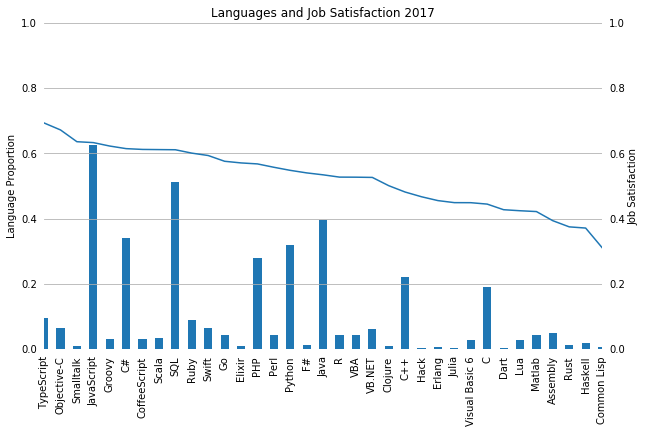

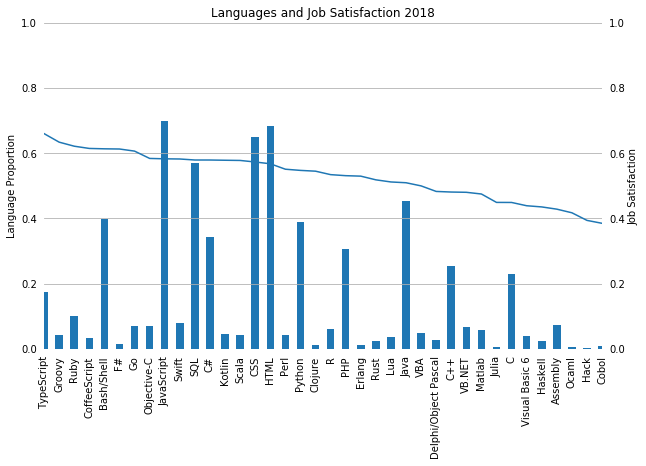

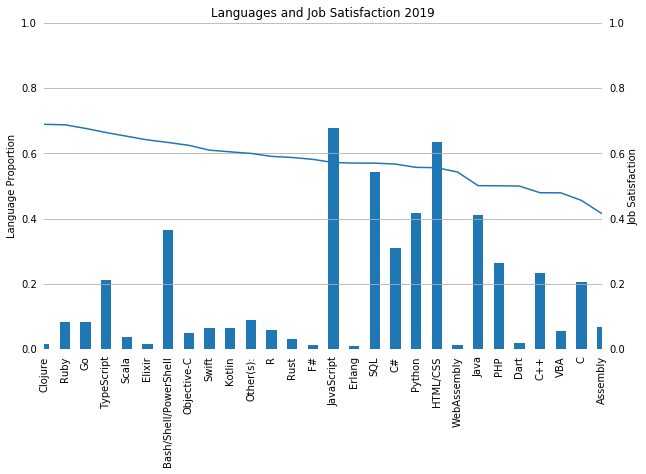

In [30]:
# plot the mean of job satisfaction with the proportion of each language
for year in job_sat_col_dict.keys():
    plot_job_sat(job_sat[year], f'Languages and Job Satisfaction {year}')

In [31]:
# create a dataframe of job satisfaction for each common language in all years
job_sat_all = pd.DataFrame(index=common_langs)
for year in job_sat_col_dict.keys():
    job_sat_all = job_sat_all.merge(job_sat[year][['job_sat_mean']], left_index=True, right_index=True, how='inner')
job_sat_all.columns = job_sat_col_dict.keys()
job_sat_all.transpose()

,SQL,Rust,Assembly,VBA,Java,Swift,Go,F#,TypeScript,PHP,...,R,Erlang,C#,Ruby,C++,Python,JavaScript,Scala,Objective-C,C
2017,0.611443,0.37500,0.393856,0.527319,0.534563,0.593750,0.576108,0.540481,0.693521,0.568027,...,0.527540,0.455516,0.614861,0.601083,0.481790,0.548274,0.633355,0.611917,0.672201,0.444795
2018,0.578845,0.51804,0.428125,0.499475,0.509135,0.581933,0.606110,0.612556,0.659695,0.530805,...,0.533970,0.529345,0.578801,0.621160,0.480626,0.546988,0.582489,0.577485,0.583666,0.448675
2019,0.569935,0.58733,0.414709,0.478979,0.500961,0.609854,0.676573,0.581706,0.663823,0.500608,...,0.590729,0.570142,0.567185,0.687628,0.479195,0.557089,0.571793,0.652463,0.624672,0.455792


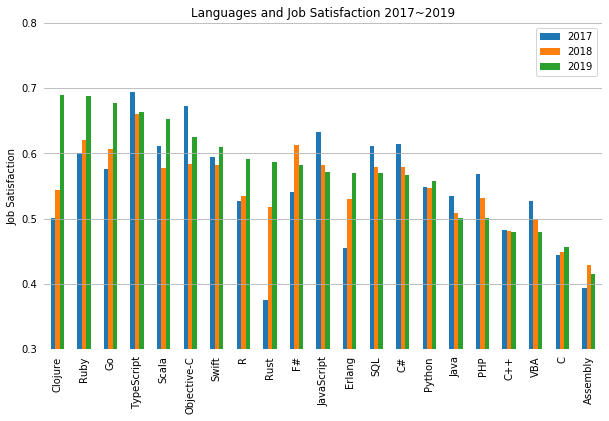

In [32]:
# plot job satisfaction for each common language in all years
df_plot = job_sat_all.sort_values(by='2019', ascending=False)
ax = df_plot.plot(
        figsize=(10,6),
        kind='bar', 
        legend=True,
        ylim=(0.3, 0.8),
    )
ax.set_ylabel('Job Satisfaction')
plt.grid(True, axis='y')
plt.title('Languages and Job Satisfaction 2017~2019')
plt.tick_params(left=False, bottom=False)
plt.box(False)
plt.show();

## What are the languages that most people choose as their starting language?

### Data Understanding

With 2017, there are two columns related to years of coding. We need to fill missing values in one column with the other column at first. 

In [33]:
# fill missing values with a column
data['2017']['YearsCodedJob'].fillna(data['2017']['YearsCodedJobPast'], inplace=True)

In [34]:
# columns indicating years of code
yr_code_col_dict = {
    '2017': 'YearsCodedJob',
    '2018': 'YearsCoding',
    '2019': 'YearsCode',
}

In [35]:
# check the proportion of missing values in these columns
for year, col in yr_code_col_dict.items():
    print(year, data[year][col].isnull().mean())

2017 0.18561254669987548
2018 0.050781447574730666
2019 0.010631954366976813


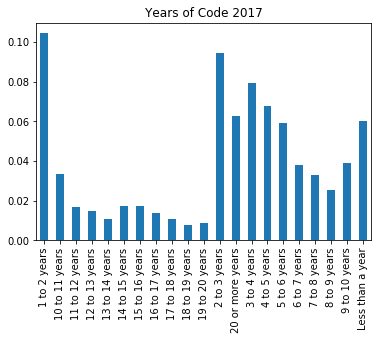

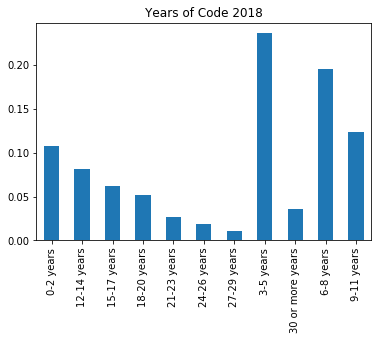

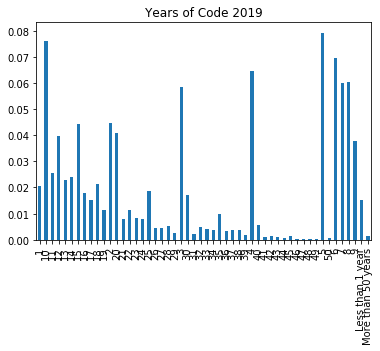

In [36]:
# check the proportion of each value in these columns
for year, col in yr_code_col_dict.items():
    plot_value_counts(col, data[year], f'Years of Code {year}')

### Prepare Data

Because each survey has different levels in these columns, we have to convert those levels into the same rough scale before comparison.

In [37]:
# create a dict for re-encoding
yr_code_enc_dict = {
    '2017': {},
    '2018': {},
    '2019': {},
}

possible_yr_code_values = [
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years', 
    '15-17 years', 
    '18-20 years', 
    '>20 years',
]

# year 2017
# 0-2 years
yr_code_enc_dict['2017'].update({k:'0-2 years' for k in ['Less than a year', '1 to 2 years']})
# 3-5 ~ 18-20 years
for i in range(3, 20, 3):
    lst = [f'{j} to {j+1} years' for j in range(i-1, i+2)]
    yr_code_enc_dict['2017'].update({k:f'{i}-{i+2} years' for k in lst})
# >20 years
yr_code_enc_dict['2017'].update({'20 or more years':'>20 years'})  

# year 2018
# 0-2 ~ 18-20 years
for i in range(0, 20, 3):
    lst = [f'{j}-{j+2} years' for j in range(i, i+3)]
    yr_code_enc_dict['2018'].update({k:f'{i}-{i+2} years' for k in lst})
# >20 years
yr_code_enc_dict['2018'].update({k:'>20 years' for k in \
        ['21-23 years', '24-26 years', '27-29 years', '30 or more years']})

# year 2019
# 0-2 years
yr_code_enc_dict['2019'].update({k:'0-2 years' for k in ['Less than 1 year', '1', '2']})
# 3-5 ~ 18-20 years
for i in range(3, 20, 3):
    yr_code_enc_dict['2019'].update({str(k):f'{i}-{i+2} years' for k in range(i, i+3)})
# >20 years
yr_code_enc_dict['2019'].update({str(k):'>20 years' for k in (list(range(21, 51))+['More than 50 years'])})

In [38]:
def total_count_yr_code(df, look_for):
    """
    INPUT:
        df - the pandas dataframe you want to search
        look_for - a list of strings you want to search for in each row of df['language']
    OUTPUT:
        new_df - a dataframe of each look_for with the proportion
    """
    new_df = pd.Series(0, index=pd.MultiIndex.from_product(
            [look_for, possible_yr_code_values],names=('language', 'years_of_code')))    
    mix_langs = df.index.levels[0]
    for idx in range(len(mix_langs)):
        mix_langs_lst = separate_langs(mix_langs[idx])
        for lang in look_for:
            if lang in mix_langs_lst:
                new_df[lang] = new_df[lang].add(df.loc[mix_langs[idx]]['count'], fill_value=0)
    return new_df

In [39]:
def clean_yr_code(df, lang_col, possible_langs_, cod_col, cod_enc_dict):
    """
    INPUT: 
        df - a dataframe holding the years of coding column
        lang_col - the column name with languages strings
        possible_langs - a list of languages you want to search for in each row of df[lang_col]
        cod_col - the column name with years of coding values
        cod_enc_dict - the mapping dictionary for re-encoding
    OUTPUT:
        new_df - a dataframe for each possible_langs of years of coding
    """
    new_df = df[[lang_col, cod_col]].copy()
    
    # re-encode
    new_df[cod_col].replace(cod_enc_dict, inplace=True)
    
    # count
    new_df = new_df.groupby([lang_col, cod_col]).size().reset_index()
    new_df.columns = ['language', 'years_of_code', 'count']
    new_df.set_index(['language', 'years_of_code'], inplace=True)
    new_df = total_count_yr_code(new_df, possible_langs_)
    return new_df

In [40]:
# clean up years of code columns
yr_code = {}

for year in yr_code_col_dict.keys():
    
    lang_col = worked_langs_col_dict[year]
    possible_langs_ = possible_langs[year]
    
    cod_col = yr_code_col_dict[year]
    cod_enc_dict = yr_code_enc_dict[year]
    
    yr_code[year] = clean_yr_code(data[year], lang_col, possible_langs_, cod_col, cod_enc_dict)

### Visualize the Results

In [112]:
def plot_yr_code(df, title, only_new_comer=False):
    """
    INPUT:
        df - the pandas dataframe you want to plot
        title - the title string of your plot
        only_new_comer - only plot 0-5 years data
    OUTPUT:
        None
    """
    # use proportion    
    df = df.div(df.sum(level=0), axis='index', level=0)
    # reindex() is for sorting years of code labels
    df = df.unstack(level=1).reindex(possible_yr_code_values, axis=1)
    if only_new_comer:
        df['0-5 years'] = df['0-2 years'] + df['3-5 years']
        df = df[['0-5 years']].sort_values(by='0-5 years', ascending=False)
        df['rank'] = np.arange(1, len(df)+1)
        df[['0-5 years']].plot.bar(figsize=(10,8))
        plt.yticks(np.arange(0.05, 0.6, 0.05))
        plt.xlabel('')
        plt.legend()
    else:
        df.plot.barh(figsize=(10,15), stacked=True, colormap=plt.cm.summer_r)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.tick_params(labeltop=True, left=False, right=False, top=True, bottom=True)
        plt.xlim(0,1)
        plt.ylabel('')
        plt.gca().invert_yaxis()
    plt.title(title, pad=40)
    plt.show();
    return df

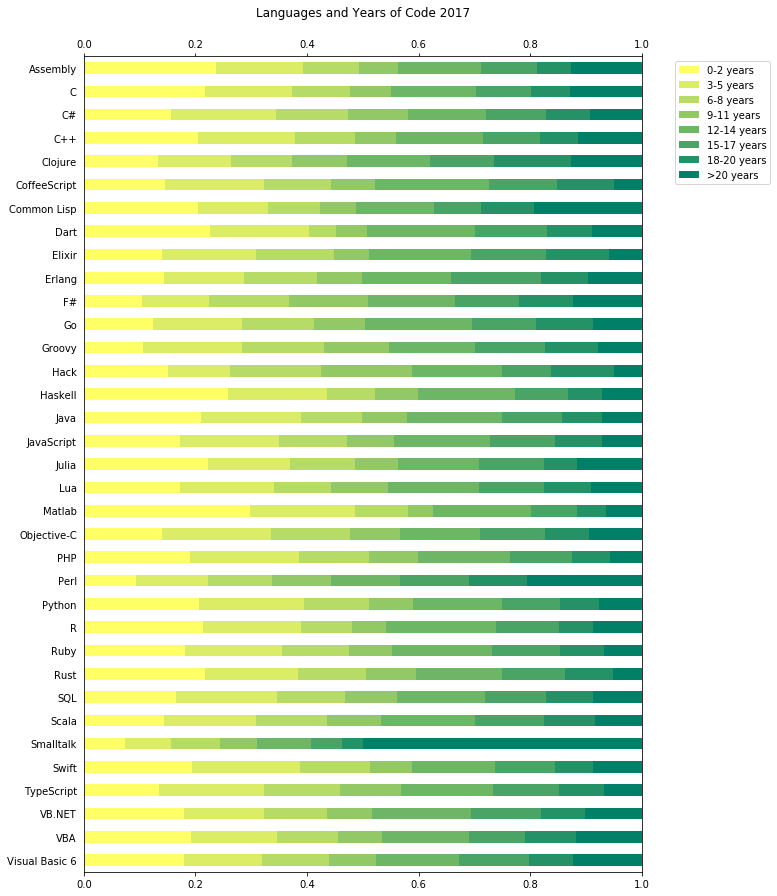

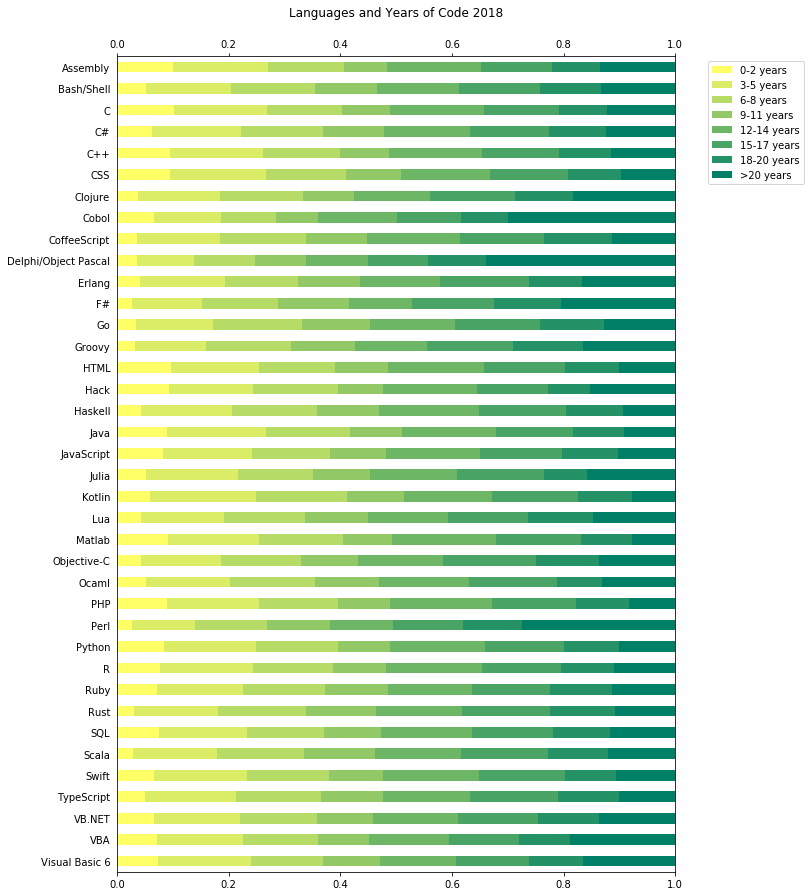

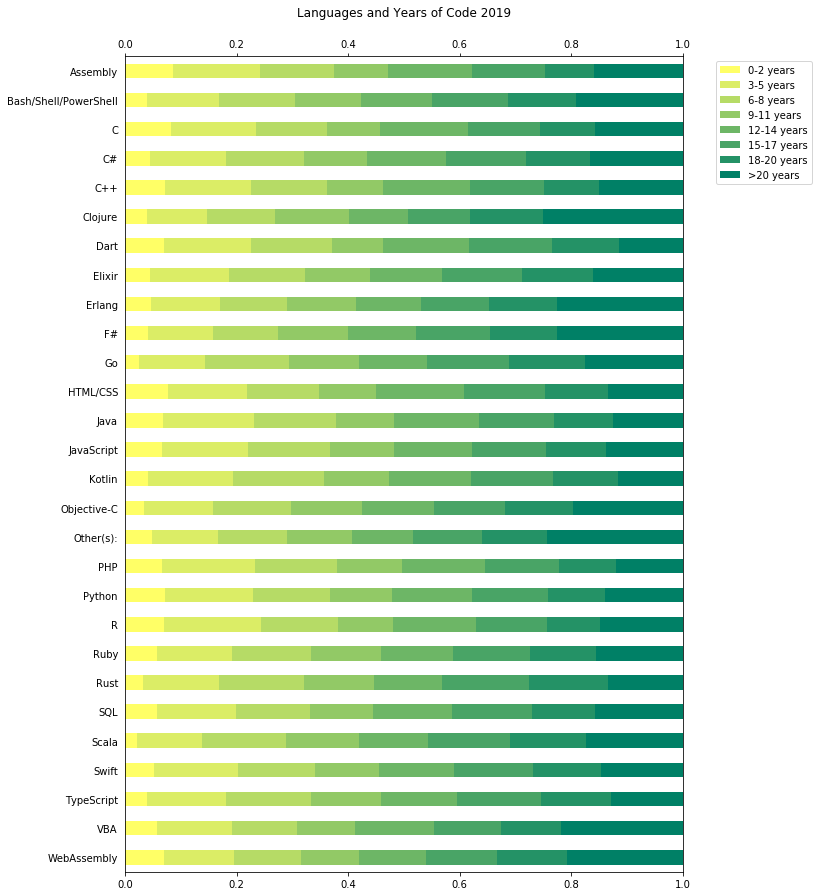

In [113]:
# plot the proportion of years of code of each language in each year
for year in yr_code_col_dict.keys():
    plot_yr_code(yr_code[year], f'Languages and Years of Code {year}')

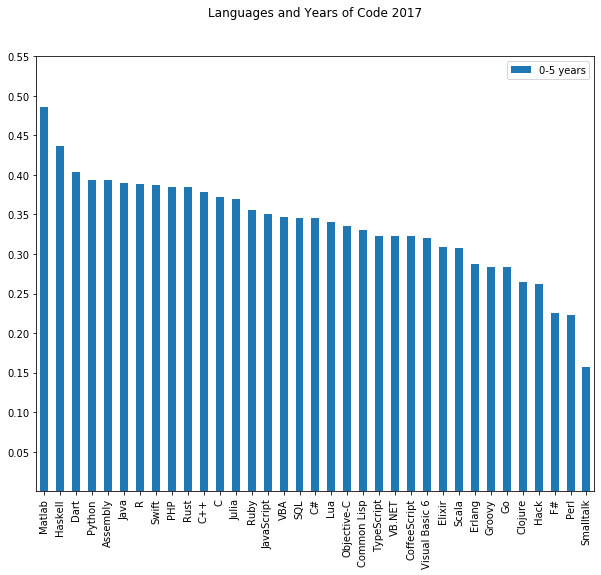

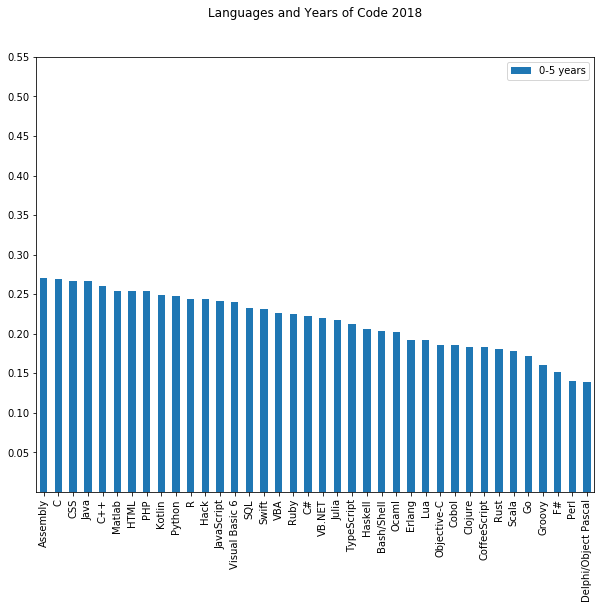

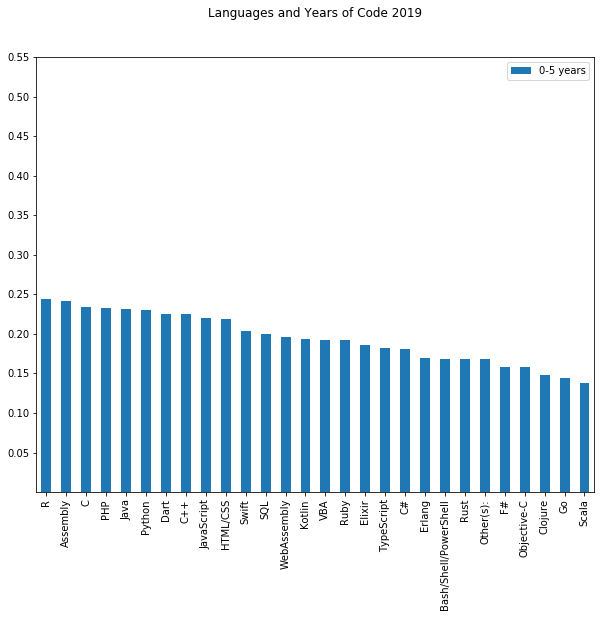

In [114]:
# plot the proportion of new-comers of each language in each year
# and get rankings of common languages in all years
yr_code_ranks = pd.DataFrame(index=common_langs)

for year in yr_code_col_dict.keys():
    df = plot_yr_code(yr_code[year], f'Languages and Years of Code {year}', only_new_comer=True)
    yr_code_ranks = yr_code_ranks.merge(df, left_index=True, right_index=True, how='inner').drop('0-5 years', axis=1)

yr_code_ranks.columns = yr_code_col_dict.keys()

In [115]:
yr_code_ranks.transpose()

,SQL,Rust,Assembly,VBA,Java,Swift,Go,F#,TypeScript,PHP,...,R,Erlang,C#,Ruby,C++,Python,JavaScript,Scala,Objective-C,C
2017,17,10,5,16,6,8,30,33,22,9,...,7,28,18,14,11,4,15,27,20,12
2018,15,32,1,17,4,16,34,36,22,8,...,11,26,19,18,5,10,13,33,28,2
2019,12,22,2,15,5,11,27,24,18,4,...,1,20,19,16,8,6,9,28,25,3


In [116]:
# create a dataframe of years of code for each common language in all years
# yr_code_all = None

# for year in yr_code_col_dict.keys():
#     df = yr_code[year].reset_index()
#     df.columns = ['language', 'years_of_code', 'count']
#     df = df[df['language'].isin(common_langs)]
#     df['year'] = year
#     df.set_index(['language', 'years_of_code', 'year'], inplace=True)
#     if yr_code_all is None:
#         yr_code_all = df
#     else:
#         yr_code_all = pd.concat([yr_code_all, df])
# # sum up counts for years
# yr_code_all = yr_code_all.reset_index().groupby(['language', 'years_of_code']).sum(level=1)['count']
# # plot years of code for each common language in all years
# plot_yr_code(yr_code_all, 'Languages and Years of Code 2017~2019')

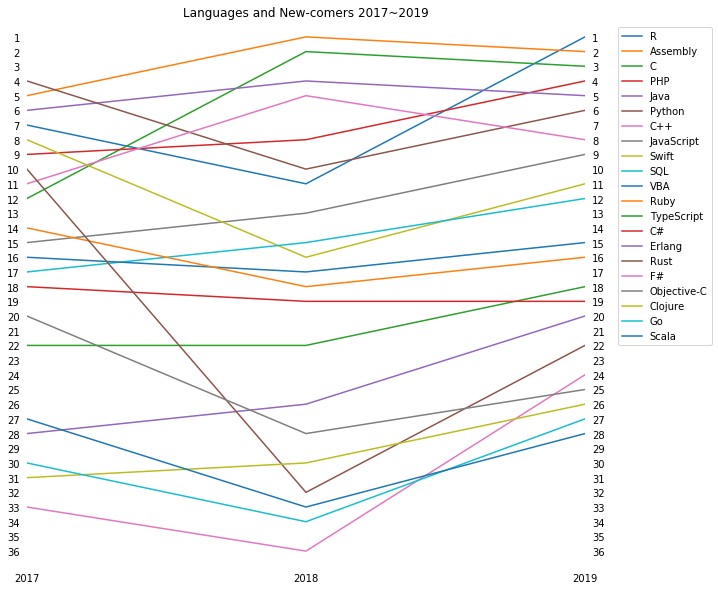

In [117]:
# plot rankings of new-comers for each common language in all years
plot_rankings(yr_code_ranks, 37, 'Languages and New-comers 2017~2019')